In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("stock_prices.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.drop('Adj Close',axis =1 ,inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


In [18]:
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


### Plotting data

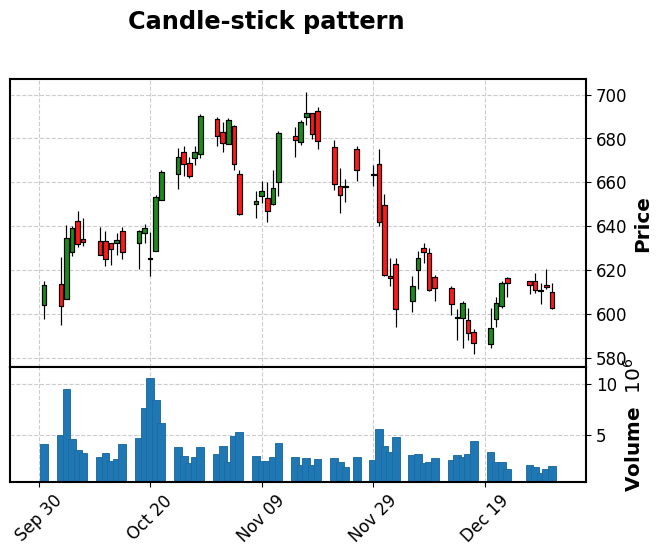

In [68]:
import mplfinance as mpf
start_date = '2021-10-01'
end_date = '2021-12-31'
sliced_data = data.loc[start_date:end_date]

market_colors = mpf.make_marketcolors(up='g', down='r')
custom_style = mpf.make_mpf_style(base_mpf_style='classic', marketcolors=market_colors)

mpf.plot(sliced_data,type ='candle',volume =True,show_nontrading =True ,style = custom_style,title='Candle-stick pattern')

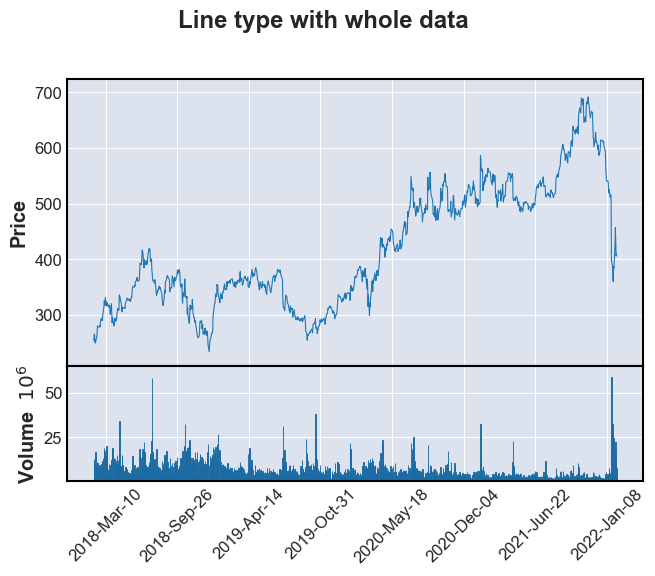

In [69]:
mpf.plot(data,type ='line',volume=True,show_nontrading =True,title='Line type with whole data')

### Adding Technical Indicators

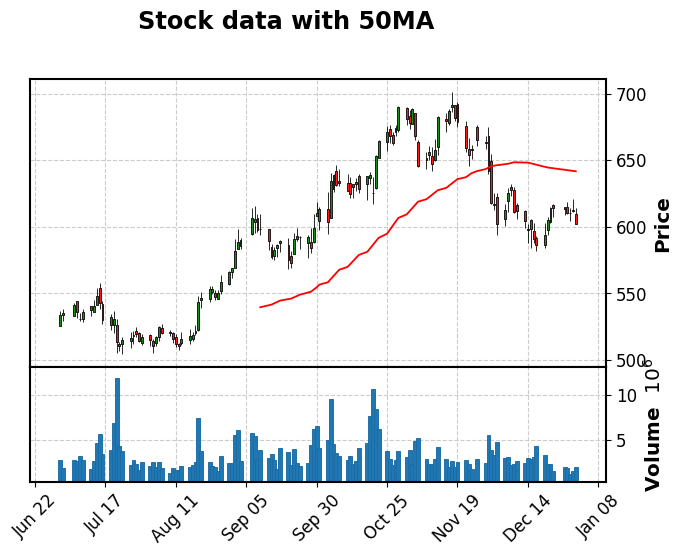

In [27]:
import warnings
warnings.filterwarnings('ignore')


start_date = '2021-07-01'
end_date = '2021-12-31'
sliced_data = data.loc[start_date:end_date]

sliced_data['MA_50'] = sliced_data['Close'].rolling(window=50).mean()


addplot_ma50 = mpf.make_addplot(sliced_data['MA_50'], color='red',ylabel='MA_50')


market_colors = mpf.make_marketcolors(up='g', down='r')


custom_style = mpf.make_mpf_style(base_mpf_style='classic', marketcolors=market_colors)


mpf.plot(sliced_data, type='candle', style=custom_style, volume=True, show_nontrading=True,
         addplot=[ addplot_ma50],title='Stock data with 50MA')


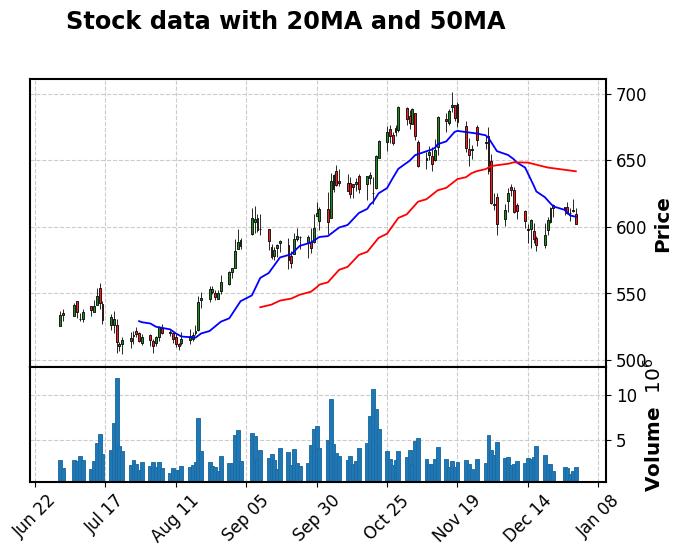

In [28]:

sliced_data['MA_20'] = sliced_data['Close'].rolling(window=20).mean()

addplot_ma20 = mpf.make_addplot(sliced_data['MA_20'], color='blue',ylabel='MA_20')

mpf.plot(sliced_data, type='candle', style=custom_style, volume=True, show_nontrading=True,
         addplot=[addplot_ma20, addplot_ma50],title='Stock data with 20MA and 50MA')

### Splitting Data

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


features = ['Open','High','Low','Volume']
predictor = 'Close'

X = data[features]
Y = data[predictor]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,shuffle=False)


In [12]:
X_train.shape,X_test.shape

((807, 4), (202, 4))

In [13]:
X_test 

,Open,High,Low,Volume
Date,,,,
2021-04-21,508.000000,515.460022,503.600006,22897400
2021-04-22,513.820007,513.960022,500.549988,9061100
2021-04-23,509.010010,509.700012,500.700012,7307700
2021-04-26,506.760010,510.480011,503.000000,4388800
2021-04-27,512.619995,512.989990,504.579987,3761300
...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,20047500
2022-02-01,432.959991,458.480011,425.540009,22542300
2022-02-02,448.250000,451.980011,426.480011,14346000


### Building Linear Regression ML model 

In [14]:
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

Intercept and Co-efficients of the model 

In [36]:
print("Intercept-")
print(model.intercept_)
print()
print("Co-efficient-")
print(model.coef_)

Intercept-
-0.053858220153188086

Co-efficient-
[-6.12126274e-01  7.99431852e-01  8.12779749e-01  4.78717675e-08]


Predicting 'Close' values with the help of the model

In [40]:
prediction = model.predict(X_test)
prediction

array([511.47317992, 503.57009194, 503.14682791, 506.87731884,
       506.55096712, 506.38849956, 502.19606795, 512.83506402,
       511.81698717, 500.2866835 , 498.93906685, 495.25052277,
       505.05619945, 490.23889396, 493.61908062, 489.02241712,
       485.34873517, 492.5415687 , 489.13949897, 490.76522256,
       484.81418077, 499.76532414, 500.32796611, 502.46090671,
       500.90368681, 502.39050008, 501.93320644, 508.89243291,
       500.14105824, 499.3843623 , 490.08618699, 499.1683983 ,
       494.13741046, 492.35565473, 487.89979211, 485.70951527,
       489.4603335 , 498.67532571, 492.56510132, 489.23724209,
       499.54322689, 502.16188296, 494.60170775, 508.57921272,
       514.94617151, 517.61606744, 529.33745327, 530.00541296,
       531.66737987, 528.55578262, 534.89484432, 533.05058805,
       541.0068559 , 534.45791052, 533.23585213, 534.96136977,
       534.65898835, 543.53415876, 551.68990862, 544.27338967,
       531.76923448, 530.21330098, 530.15305355, 513.89

Combining Actual values and Predicted values of X_test into a new dataframe

In [41]:
new_data = pd.DataFrame({'Actual':Y_test,'Predicted':prediction})
new_data.head()

,Actual,Predicted
Date,,
2021-04-21,508.899994,511.473180
2021-04-22,508.779999,503.570092
2021-04-23,505.549988,503.146828
2021-04-26,510.299988,506.877319
2021-04-27,505.549988,506.550967


### Plotting the prediction 

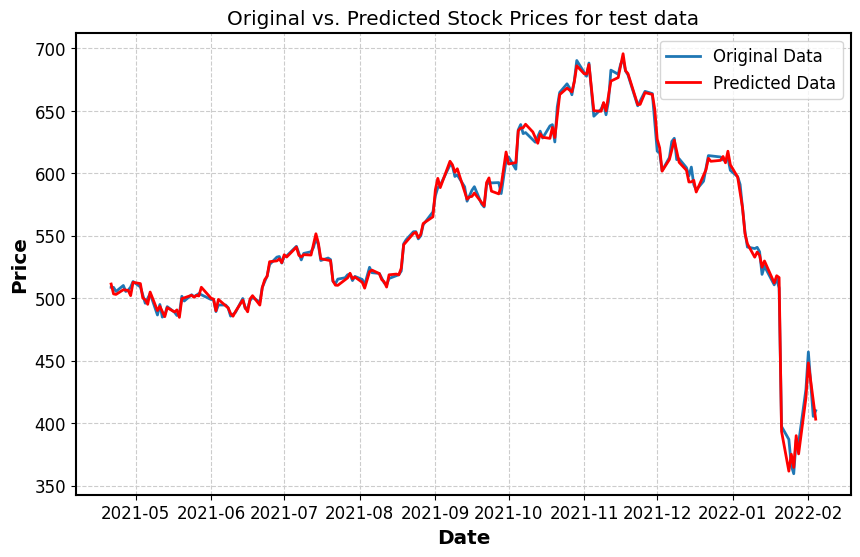

In [67]:
plt.figure(figsize=(10, 6)) 


plt.plot(new_data.index, new_data['Actual'], label='Original Data')


plt.plot(new_data.index, new_data['Predicted'], label='Predicted Data',color='r')

plt.xlabel('Date')  
plt.ylabel('Price') 
plt.title('Original vs. Predicted Stock Prices for test data')

plt.legend() 

### Validating the model

Train data accuracy and Test data accuracy

In [54]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print("Train Data Accuracy:")
print(train_accuracy)
print()
print("Test Data Accuracy:")
print(test_accuracy)

Train Data Accuracy:
0.9980413835645496

Test Data Accuracy:
0.9965159161612496


R-Square score

In [49]:
RSquare = model.score(X_test,Y_test)
print("R-Square:")
print(RSquare)

R-Square:
0.9965159161612496


Adjusted R-square score

In [55]:
x = X_test
y = Y_test

adjusted_rscore = 1 - (1-RSquare)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted-Rscore:")
print(adjusted_rscore)

Adjusted-Rscore:
0.9964451733421886


Correlation between the features

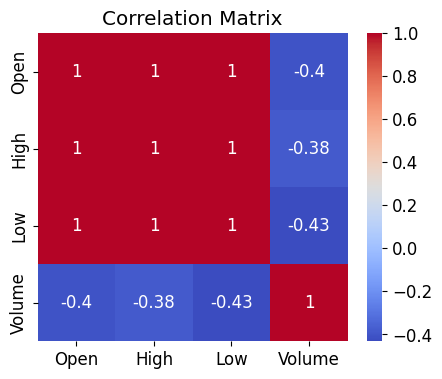

In [65]:
import seaborn as sns
corr_matrix = X_test.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mean Absolute Erorr and Mean Squared Error

In [66]:
mae = np.mean(np.abs(new_data['Actual'] - new_data['Predicted']))
print("Mean Absolute Error (MAE):", mae)


mse = np.mean((new_data['Actual'] - new_data['Predicted'])**2)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 3.0511030971182524
Mean Squared Error (MSE): 17.257208375812702
